In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import itertools
import joblib
import yaml
import pprint
import sys

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score, accuracy_score, log_loss, ConfusionMatrixDisplay

sys.path.append('C:\\Users\\a2305\\Desktop\\repository_git_dvc\\classification_with_dvc')

from src.report.visualization import plot_confusion_matrix
from src.stages.data_load import data_load


In [130]:
with open('../params.yaml') as config_file:
    config = yaml.safe_load(config_file)

In [131]:
pprint.pprint(config)

{'base': {'random_state': 42},
 'data': {'featurize_db': 'data\\processed\\features_diabetes.csv',
          'raw_db': 'data\\raw\\raw_diabetes.csv',
          'test_db': 'data\\processed\\test_diabetes.csv',
          'test_size': 0.2,
          'train_db': 'data\\processed\\train_diabetes.csv'},
 'model': {'name': 'models\\model.joblib'},
 'reports': {'confusion_matrix_image': 'reports\\confusion_matrix.png',
             'metrics_file': 'reports\\metrics.json'},
 'train': {'clf_params': {'C_values': [0.01, 0.1, 0, 1],
                          'max_iter': [50, 100, 200],
                          'multi_class_options': ['ovr', 'multinomial'],
                          'solver_options': ['newton-cg',
                                             'lbfgs',
                                             'liblinear',
                                             'sag',
                                             'saga']}}}


In [135]:
# diabetes = pd.read_csv('https://github.com/YBIFoundation/Dataset/raw/main/Diabetes.csv')
# diabetes.rename(columns={'diabetes':'target'}, inplace=True)
# diabetes.to_csv('../data/raw/raw_diabetes.csv')
# diabetes

data_load(config_path='../params.yaml')

FileNotFoundError: [Errno 2] No such file or directory: '../../params.yaml'

In [113]:
diabetes_features = diabetes[[
    'pregnancies', 'glucose', 'diastolic', 'triceps',
#     'sepal_length_in_square', 'sepal_width_in_square', 'petal_length_in_square', 'petal_width_in_square',
    'insulin', 'bmi',
    'target'
]]

In [114]:
diabetes_features.to_csv('../data/processed/features_diabetes.csv')

In [115]:
y = diabetes['target']

In [116]:
X = diabetes.drop(['target'],axis=1)

In [117]:

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [118]:
trainset_path = '../data/processed/train_diabetes.csv'
testset_path = '../data/processed/test_diabetes.csv'

X_train.to_csv(trainset_path)
X_test.to_csv(testset_path)


In [119]:


# Define the range of values for each parameter
C_values = 0.01  # Values from 0.001 to 1000 logarithmically
solver_options = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
multi_class_options = ['ovr', 'multinomial']
max_iter_values = np.random.randint(50, 500, 10)  # Random values between 50 and 500

# Randomly select values for each parameters
random_solver = np.random.choice(solver_options)
random_multi_class = np.random.choice(multi_class_options)
random_max_iter = np.random.choice(max_iter_values)

# Create a dictionary with the randomly initialized parameters
random_clf_params = {
    'C': C_values,
    'solver': random_solver,
    'multi_class': random_multi_class,
    'max_iter': random_max_iter
}


logreg = LogisticRegression(**random_clf_params, random_state=42)
model_path = ('../models/model.joblib')
joblib.dump(logreg, model_path)

logreg.fit(X_train,y_train)

c:\Users\a2305\Desktop\repository_git_dvc\classification_with_dvc\.venv\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=0.01, max_iter=475, multi_class='ovr', random_state=42,
                   solver='saga')

In [120]:
# Step 7 : predict model
y_pred = logreg.predict(X_test)

In [121]:
# Step 8 : model accuracy


In [122]:
cm = confusion_matrix(y_test,y_pred)

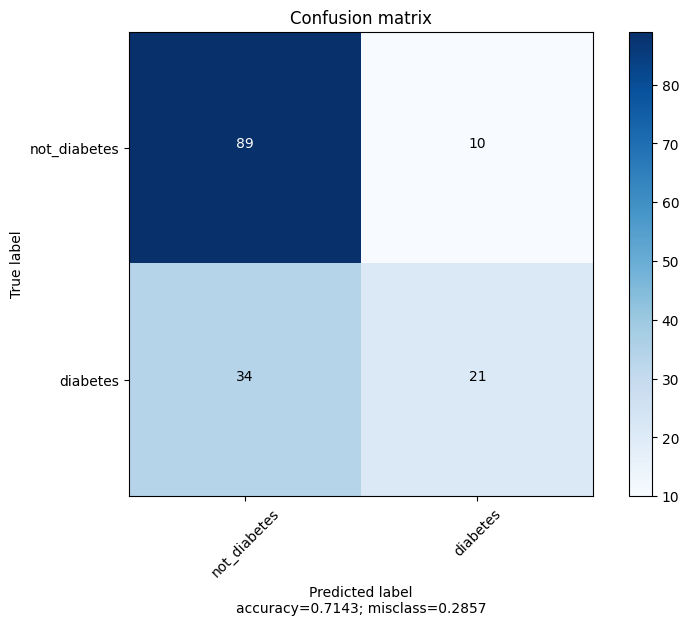

In [123]:
cm_plot = plot_confusion_matrix(cm, target_names=['not_diabetes','diabetes'], normalize=False)

In [124]:
accuracy_score(y_test,y_pred)

0.7142857142857143

In [125]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.72      0.90      0.80        99
           1       0.68      0.38      0.49        55

    accuracy                           0.71       154
   macro avg       0.70      0.64      0.65       154
weighted avg       0.71      0.71      0.69       154



In [126]:
f1 = f1_score(y_true=y_test, y_pred=y_pred, average='macro')
accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
loss = log_loss(y_true=y_test, y_pred=y_pred)

In [127]:
metrics_file = '../reports/metrics.json'

metrics = {
    'f1': f1,
    'accuracy': accuracy,
    'loss': loss
}

with open(metrics_file, 'w') as mf:
    json.dump(
        obj=metrics,
        fp=mf,
        indent=4
    )

In [128]:
# Save confusion matrix image
confusion_matrix_image = '../reports/confusion_matrix.png'
cm_plot.savefig(confusion_matrix_image)